In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Step 1: Load dataset (using CIFAR-10 as an example)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


In [3]:
# Step 2: Data Preprocessing
# Normalize the pixel values between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Step 3: Build a Transfer Learning model
# Load the VGG16 model with pretrained ImageNet weights, without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
# Freeze the convolutional base
base_model.trainable = False

In [7]:
# Create a new model on top of the VGG16 base
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output for 10 classes (CIFAR-10)


In [8]:

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=1, batch_size=64, validation_split=0.2)

625/625 ━━━━━━━━━━━━━━━━━━━━ 545s 872ms/step - accuracy: 0.6284 - loss: 1.0696 - val_accuracy: 0.5918 - val_loss: 1.1619


In [14]:
# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 357ms/step - accuracy: 0.5884 - loss: 1.1596
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 361ms/step


In [15]:
# Calculate test accuracy
print(f"Test Accuracy: {accuracy_score(y_true, y_pred)}")

Test Accuracy: 0.5886


In [16]:

# Visualization: Display some feature maps
# Let's visualize feature maps from the first convolutional layer of the base model

# Select an image from the test set to visualize
test_img = X_test[0:1]

In [17]:

# Build a model to extract outputs from the first convolutional layer
layer_outputs = [layer.output for layer in base_model.layers[:4]]  # Get outputs from first 4 layers
activation_model = models.Model(inputs=base_model.input, outputs=layer_outputs)

In [18]:
# Get feature maps
activations = activation_model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [19]:

# Visualize the feature maps of the first convolutional layer
first_layer_activation = activations[0]

In [20]:
# Check the number of available feature maps
num_feature_maps = first_layer_activation.shape[-1]

In [21]:
# Set the number of feature maps to display
num_display = min(16, num_feature_maps)


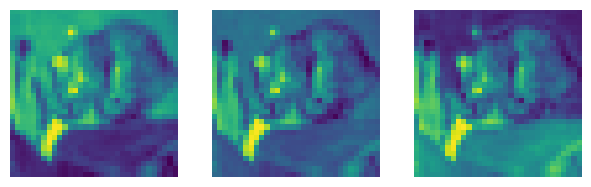

In [22]:
# Plot feature maps
plt.figure(figsize=(10, 10))
for i in range(num_display):  # Display available feature maps
    plt.subplot(4, 4, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()